In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier #to train the model
from sklearn.model_selection import train_test_split #to split the dataset into 2 sets for training and testing
from sklearn import preprocessing #to convert strings to floats
from sklearn import tree #To export the decision tree in a graph format
import joblib #for saving and loading prediction models
from sklearn.metrics import accuracy_score #calculate the accuracy of the model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression #for the linear regression model


%matplotlib inline

In [265]:
pd.set_option('display.max_columns', None) #show all the columns
df = pd.read_csv("C:\\Users\\kaudim\\Documents\\Work\\Trainings\\Jupyter playarea\\south_africa_training_set.csv") #import file

In [3]:
df.shape

(2153657, 23)

In [206]:
df.isna().sum()

Unnamed: 0                                 0
target                                     0
hashed_user_id                             0
regist_date                                0
is_bind_card                               0
lastorder_usecase                    1562768
lastorder_platform                   1562760
lastorder_orderdate                  2005775
subtotal_amount_today_daily                0
subtotal_amount_recent_7days               0
subtotal_amount_recent_30days              0
subtotal_ordercount_today_daily            0
subtotal_ordercount_recent_7days           0
subtotal_ordercount_recent_30days          0
nr_interactions                            0
nr_days_interacted                         0
max_date_time                              0
nr_unique_pages_visited                    0
search_events                              0
unique_search_terms                        0
unique_app_visits                          0
unique_app_category_visits                 0
year_month

In [4]:
df.dtypes

Unnamed: 0                             int64
target                                object
hashed_user_id                         int64
regist_date                           object
is_bind_card                           int64
lastorder_usecase                     object
lastorder_platform                    object
lastorder_orderdate                   object
subtotal_amount_today_daily          float64
subtotal_amount_recent_7days         float64
subtotal_amount_recent_30days        float64
subtotal_ordercount_today_daily        int64
subtotal_ordercount_recent_7days       int64
subtotal_ordercount_recent_30days      int64
nr_interactions                        int64
nr_days_interacted                     int64
max_date_time                         object
nr_unique_pages_visited                int64
search_events                          int64
unique_search_terms                    int64
unique_app_visits                      int64
unique_app_category_visits             int64
year_month

In [3]:
df.head() #view the first 5 rows of the data

,Unnamed: 0,target,hashed_user_id,regist_date,is_bind_card,lastorder_usecase,lastorder_platform,lastorder_orderdate,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month
0,0,active,-1000772633524872632,2022-12-30,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,15,1,2022-12-30,6,0,0,2,1,202212
1,1,inactive,-1000772633524872632,2022-12-30,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,11,2,2023-01-20,2,0,0,2,1,202301
2,2,inactive,-1006559301419582051,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,4,1,2022-12-06,2,0,0,1,0,202212
3,3,inactive,-1006671521575354929,2023-01-03,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,35,1,2023-01-03,17,0,0,3,2,202301
4,4,inactive,-1008193142447905044,2021-10-16,1,-1,-1,NaN,0.0,0.0,0.0,0,0,0,158,3,2022-11-21,12,0,0,7,5,202211


In [266]:
df

,Unnamed: 0,target,hashed_user_id,regist_date,is_bind_card,lastorder_usecase,lastorder_platform,lastorder_orderdate,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month
0,0,active,-1000772633524872632,2022-12-30,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,15,1,2022-12-30,6,0,0,2,1,202212
1,1,inactive,-1000772633524872632,2022-12-30,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,11,2,2023-01-20,2,0,0,2,1,202301
2,2,inactive,-1006559301419582051,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,4,1,2022-12-06,2,0,0,1,0,202212
3,3,inactive,-1006671521575354929,2023-01-03,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,35,1,2023-01-03,17,0,0,3,2,202301
4,4,inactive,-1008193142447905044,2021-10-16,1,-1,-1,NaN,0.0,0.0,0.0,0,0,0,158,3,2022-11-21,12,0,0,7,5,202211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153652,2153652,active,996679794252145381,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,78,3,2022-10-31,16,0,0,3,2,202210
2153653,2153653,active,996679794252145381,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,72,4,2022-11-30,5,0,0,6,5,202211
2153654,2153654,active,996679794252145381,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,40,6,2022-12-31,4,0,0,5,3,202212
2153655,2153655,inactive,996679794252145381,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,19,2,2023-01-28,6,0,0,3,2,202301


In [6]:
df.columns #view column names

Index(['Unnamed: 0', 'target', 'hashed_user_id', 'regist_date', 'is_bind_card',
       'lastorder_usecase', 'lastorder_platform', 'lastorder_orderdate',
       'subtotal_amount_today_daily', 'subtotal_amount_recent_7days',
       'subtotal_amount_recent_30days', 'subtotal_ordercount_today_daily',
       'subtotal_ordercount_recent_7days', 'subtotal_ordercount_recent_30days',
       'nr_interactions', 'nr_days_interacted', 'max_date_time',
       'nr_unique_pages_visited', 'search_events', 'unique_search_terms',
       'unique_app_visits', 'unique_app_category_visits', 'year_month'],
      dtype='object')

In [29]:
df.isna().sum() #view the number of N/A or nulls per column

Unnamed: 0                                 0
target                                     0
hashed_user_id                             0
regist_date                                0
is_bind_card                               0
lastorder_usecase                          8
lastorder_platform                         0
lastorder_orderdate                  1562760
subtotal_amount_today_daily                0
subtotal_amount_recent_7days               0
subtotal_amount_recent_30days              0
subtotal_ordercount_today_daily            0
subtotal_ordercount_recent_7days           0
subtotal_ordercount_recent_30days          0
nr_interactions                            0
nr_days_interacted                         0
max_date_time                              0
nr_unique_pages_visited                    0
search_events                              0
unique_search_terms                        0
unique_app_visits                          0
unique_app_category_visits                 0
year_month

In [31]:
df.describe() #show summary of the numerical data

,Unnamed: 0,hashed_user_id,is_bind_card,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month
count,2.153657e+06,2.153657e+06,2.153657e+06,2.153657e+06,2.153657e+06,2.153657e+06,2.153657e+06,2.153657e+06,2.153657e+06,2.153657e+06,2.153657e+06,2.153657e+06,2.153657e+06,2.153657e+06,2.153657e+06,2.153657e+06,2.153657e+06
mean,1.076828e+06,-2.821492e+15,3.401944e-01,2.688392e+00,1.677327e+01,5.193925e+01,8.277223e-02,5.021621e-01,1.642510e+00,1.315539e+02,5.285590e+00,1.076210e+01,4.950278e-02,3.041106e-02,2.816442e+00,1.517063e+00,2.022388e+05
std,6.217074e+05,5.325564e+18,4.737745e-01,4.328870e+01,1.371037e+02,3.022580e+02,3.781847e-01,1.709372e+00,5.206668e+00,2.624709e+02,6.693734e+00,9.889288e+00,5.629539e-01,2.616042e-01,2.609502e+00,1.621835e+00,4.148410e+01
min,0.000000e+00,-9.223298e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.022100e+05
25%,5.384140e+05,-4.608346e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.022110e+05
50%,1.076828e+06,-1.225755e+16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,2.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.022120e+05
75%,1.615242e+06,4.610791e+18,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.330000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,2.023010e+05
max,2.153656e+06,9.223346e+18,1.000000e+00,1.817151e+04,5.457600e+04,1.098002e+05,1.900000e+01,8.800000e+01,2.720000e+02,4.654100e+04,3.100000e+01,1.940000e+02,1.680000e+02,6.200000e+01,9.000000e+01,3.000000e+01,2.023010e+05


In [30]:
categorical = df.dtypes[df.dtypes== 'object'].index #gather the categorical values
df[categorical].describe() #decribe the categorical values

,target,regist_date,lastorder_usecase,lastorder_platform,lastorder_orderdate,max_date_time
count,2153657,2153657,2153649,2153657,590897,2153657
unique,2,603,8,2,138,123
top,inactive,2021-10-12,-1,-1,2023-01-31,2023-01-31
freq,1184991,27497,1562760,1562760,41300,142275


In [97]:
df.duplicated().sum() #check the number of duplicated rows.

0

In [93]:
df.duplicated(subset =['hashed_user_id', 'regist_date']).sum() #the number of duplicated rows using the subset columns

968666

In [275]:
df['User_Count'] = df.groupby(['target','hashed_user_id'])['hashed_user_id'].transform('count')

In [276]:
df

,Unnamed: 0,target,hashed_user_id,regist_date,is_bind_card,lastorder_usecase,lastorder_platform,lastorder_orderdate,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month,NumberOFUserOccur,User_Count
0,0,active,-1000772633524872632,2022-12-30,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,15,1,2022-12-30,6,0,0,2,1,202212,NaN,1
1,1,inactive,-1000772633524872632,2022-12-30,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,11,2,2023-01-20,2,0,0,2,1,202301,NaN,1
2,2,inactive,-1006559301419582051,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,4,1,2022-12-06,2,0,0,1,0,202212,NaN,1
3,3,inactive,-1006671521575354929,2023-01-03,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,35,1,2023-01-03,17,0,0,3,2,202301,NaN,1
4,4,inactive,-1008193142447905044,2021-10-16,1,-1,-1,NaN,0.0,0.0,0.0,0,0,0,158,3,2022-11-21,12,0,0,7,5,202211,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153652,2153652,active,996679794252145381,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,78,3,2022-10-31,16,0,0,3,2,202210,NaN,3
2153653,2153653,active,996679794252145381,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,72,4,2022-11-30,5,0,0,6,5,202211,NaN,3
2153654,2153654,active,996679794252145381,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,40,6,2022-12-31,4,0,0,5,3,202212,NaN,3
2153655,2153655,inactive,996679794252145381,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,19,2,2023-01-28,6,0,0,3,2,202301,NaN,1


In [285]:
df['Monthly_Spend_Per_Status'] = df.groupby(['target','hashed_user_id'])['subtotal_amount_recent_30days'].transform('sum')

In [287]:
df = df.drop(columns=['Active_Monthly_Spend'])

In [288]:
df

,Unnamed: 0,target,hashed_user_id,regist_date,is_bind_card,lastorder_usecase,lastorder_platform,lastorder_orderdate,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month,User_Count,Monthly_Spend_Per_Status
0,0,active,-1000772633524872632,2022-12-30,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,15,1,2022-12-30,6,0,0,2,1,202212,1,0.0
1,1,inactive,-1000772633524872632,2022-12-30,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,11,2,2023-01-20,2,0,0,2,1,202301,1,0.0
2,2,inactive,-1006559301419582051,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,4,1,2022-12-06,2,0,0,1,0,202212,1,0.0
3,3,inactive,-1006671521575354929,2023-01-03,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,35,1,2023-01-03,17,0,0,3,2,202301,1,0.0
4,4,inactive,-1008193142447905044,2021-10-16,1,-1,-1,NaN,0.0,0.0,0.0,0,0,0,158,3,2022-11-21,12,0,0,7,5,202211,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153652,2153652,active,996679794252145381,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,78,3,2022-10-31,16,0,0,3,2,202210,3,0.0
2153653,2153653,active,996679794252145381,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,72,4,2022-11-30,5,0,0,6,5,202211,3,0.0
2153654,2153654,active,996679794252145381,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,40,6,2022-12-31,4,0,0,5,3,202212,3,0.0
2153655,2153655,inactive,996679794252145381,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,19,2,2023-01-28,6,0,0,3,2,202301,1,0.0


In [289]:
df.isna().sum()

Unnamed: 0                                 0
target                                     0
hashed_user_id                             0
regist_date                                0
is_bind_card                               0
lastorder_usecase                          8
lastorder_platform                         0
lastorder_orderdate                  1562760
subtotal_amount_today_daily                0
subtotal_amount_recent_7days               0
subtotal_amount_recent_30days              0
subtotal_ordercount_today_daily            0
subtotal_ordercount_recent_7days           0
subtotal_ordercount_recent_30days          0
nr_interactions                            0
nr_days_interacted                         0
max_date_time                              0
nr_unique_pages_visited                    0
search_events                              0
unique_search_terms                        0
unique_app_visits                          0
unique_app_category_visits                 0
year_month

In [290]:
#change the date columns to proper type of datetime
df['regist_date'] = pd.to_datetime(df['regist_date']) 
df['max_date_time'] = pd.to_datetime(df['max_date_time'])

In [291]:
#replace the -1s with NaN
df=df.replace(to_replace='-1',value=np.nan, regex=True)

In [292]:
df.isna().sum()

Unnamed: 0                                 0
target                                     0
hashed_user_id                             0
regist_date                                0
is_bind_card                               0
lastorder_usecase                    1562768
lastorder_platform                   1562760
lastorder_orderdate                  2005775
subtotal_amount_today_daily                0
subtotal_amount_recent_7days               0
subtotal_amount_recent_30days              0
subtotal_ordercount_today_daily            0
subtotal_ordercount_recent_7days           0
subtotal_ordercount_recent_30days          0
nr_interactions                            0
nr_days_interacted                         0
max_date_time                              0
nr_unique_pages_visited                    0
search_events                              0
unique_search_terms                        0
unique_app_visits                          0
unique_app_category_visits                 0
year_month

In [293]:
df.query('regist_date=="NaN"')

,Unnamed: 0,target,hashed_user_id,regist_date,is_bind_card,lastorder_usecase,lastorder_platform,lastorder_orderdate,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month,User_Count,Monthly_Spend_Per_Status


In [81]:
df.isna().sum()

Unnamed: 0                                 0
target                                     0
hashed_user_id                             0
regist_date                                0
is_bind_card                               0
lastorder_usecase                    1562768
lastorder_platform                   1562760
lastorder_orderdate                  2005775
subtotal_amount_today_daily                0
subtotal_amount_recent_7days               0
subtotal_amount_recent_30days              0
subtotal_ordercount_today_daily            0
subtotal_ordercount_recent_7days           0
subtotal_ordercount_recent_30days          0
nr_interactions                            0
nr_days_interacted                         0
max_date_time                              0
nr_unique_pages_visited                    0
search_events                              0
unique_search_terms                        0
unique_app_visits                          0
unique_app_category_visits                 0
year_month

In [ ]:
df.query('regist_date== "NaN"')['target'].sum().plot(kind='bar')

In [82]:
active_orig = df.query('target=="active"')
active_orig.query('regist_date == "NaN"')

,Unnamed: 0,target,hashed_user_id,regist_date,is_bind_card,lastorder_usecase,lastorder_platform,lastorder_orderdate,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month


In [8]:
active_orig.query('regist_date!= "NaN"')

NameError: name 'active_orig' is not defined

In [306]:
filtered_df = df.drop(columns=['Unnamed: 0','subtotal_amount_today_daily', 'subtotal_amount_recent_7days', 'subtotal_ordercount_today_daily',
                               'subtotal_ordercount_recent_7days','lastorder_usecase','lastorder_platform',
                               'lastorder_orderdate'])

In [307]:
filtered_df

,target,hashed_user_id,regist_date,is_bind_card,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month,User_Count,Monthly_Spend_Per_Status
0,active,-1000772633524872632,2022-12-30,0,0.0,0,15,1,2022-12-30,6,0,0,2,1,202212,1,0.0
1,inactive,-1000772633524872632,2022-12-30,0,0.0,0,11,2,2023-01-20,2,0,0,2,1,202301,1,0.0
2,inactive,-1006559301419582051,2022-08-15,0,0.0,0,4,1,2022-12-06,2,0,0,1,0,202212,1,0.0
3,inactive,-1006671521575354929,2023-01-03,0,0.0,0,35,1,2023-01-03,17,0,0,3,2,202301,1,0.0
4,inactive,-1008193142447905044,2021-10-16,1,0.0,0,158,3,2022-11-21,12,0,0,7,5,202211,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153652,active,996679794252145381,2022-08-15,0,0.0,0,78,3,2022-10-31,16,0,0,3,2,202210,3,0.0
2153653,active,996679794252145381,2022-08-15,0,0.0,0,72,4,2022-11-30,5,0,0,6,5,202211,3,0.0
2153654,active,996679794252145381,2022-08-15,0,0.0,0,40,6,2022-12-31,4,0,0,5,3,202212,3,0.0
2153655,inactive,996679794252145381,2022-08-15,0,0.0,0,19,2,2023-01-28,6,0,0,3,2,202301,1,0.0


<Axes: xlabel='Registration or Max date Null', ylabel='count'>

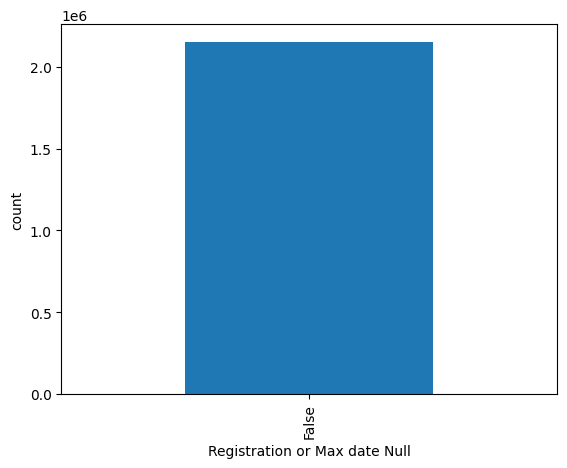

In [113]:
filtered_df.eval("max_date_time=='NaN' | regist_date=='NaN'").value_counts().plot(kind='bar', xlabel='Registration or Max date Null', ylabel='count')

In [308]:
filtered_df.isna().sum()

target                               0
hashed_user_id                       0
regist_date                          0
is_bind_card                         0
subtotal_amount_recent_30days        0
subtotal_ordercount_recent_30days    0
nr_interactions                      0
nr_days_interacted                   0
max_date_time                        0
nr_unique_pages_visited              0
search_events                        0
unique_search_terms                  0
unique_app_visits                    0
unique_app_category_visits           0
year_month                           0
User_Count                           0
Monthly_Spend_Per_Status             0
dtype: int64

In [95]:
filtered_df.shape

(2153657, 14)

In [158]:
filtered_df

,target,hashed_user_id,regist_date,is_bind_card,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month
0,active,-1000772633524872632,2022-12-30,0,0.0,0,15,1,2022-12-30,6,0,0,2,1,202212
1,inactive,-1000772633524872632,2022-12-30,0,0.0,0,11,2,2023-01-20,2,0,0,2,1,202301
2,inactive,-1006559301419582051,2022-08-15,0,0.0,0,4,1,2022-12-06,2,0,0,1,0,202212
3,inactive,-1006671521575354929,2023-01-03,0,0.0,0,35,1,2023-01-03,17,0,0,3,2,202301
4,inactive,-1008193142447905044,2021-10-16,1,0.0,0,158,3,2022-11-21,12,0,0,7,5,202211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153652,active,996679794252145381,2022-08-15,0,0.0,0,78,3,2022-10-31,16,0,0,3,2,202210
2153653,active,996679794252145381,2022-08-15,0,0.0,0,72,4,2022-11-30,5,0,0,6,5,202211
2153654,active,996679794252145381,2022-08-15,0,0.0,0,40,6,2022-12-31,4,0,0,5,3,202212
2153655,inactive,996679794252145381,2022-08-15,0,0.0,0,19,2,2023-01-28,6,0,0,3,2,202301


In [309]:
filtered_df.eval('hashed_user_id<1').value_counts()

hashed_user_id
True     1078319
False    1075338
Name: count, dtype: int64

In [310]:
filtered_df['hashed_user_id']=filtered_df['hashed_user_id'].abs()

In [311]:
filtered_df['Num_Days_Registered'] = (filtered_df['max_date_time'] - filtered_df['regist_date']).dt.days

In [312]:
filtered_df['Interactions_Per_Day'] = filtered_df['nr_interactions'] / filtered_df['Num_Days_Registered']
filtered_df['Days_No_interaction'] = filtered_df['Num_Days_Registered'] - filtered_df['nr_days_interacted']
filtered_df['Days_No_interaction_Per_month'] = filtered_df['Days_No_interaction'] / 30

In [313]:
filtered_df.dtypes

target                                       object
hashed_user_id                                int64
regist_date                          datetime64[ns]
is_bind_card                                  int64
subtotal_amount_recent_30days               float64
subtotal_ordercount_recent_30days             int64
nr_interactions                               int64
nr_days_interacted                            int64
max_date_time                        datetime64[ns]
nr_unique_pages_visited                       int64
search_events                                 int64
unique_search_terms                           int64
unique_app_visits                             int64
unique_app_category_visits                    int64
year_month                                    int64
User_Count                                    int64
Monthly_Spend_Per_Status                    float64
Num_Days_Registered                           int64
Interactions_Per_Day                        float64
Days_No_inte

In [314]:
filtered_df

,target,hashed_user_id,regist_date,is_bind_card,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month,User_Count,Monthly_Spend_Per_Status,Num_Days_Registered,Interactions_Per_Day,Days_No_interaction,Days_No_interaction_Per_month
0,active,1000772633524872632,2022-12-30,0,0.0,0,15,1,2022-12-30,6,0,0,2,1,202212,1,0.0,0,inf,-1,-0.033333
1,inactive,1000772633524872632,2022-12-30,0,0.0,0,11,2,2023-01-20,2,0,0,2,1,202301,1,0.0,21,0.523810,19,0.633333
2,inactive,1006559301419582051,2022-08-15,0,0.0,0,4,1,2022-12-06,2,0,0,1,0,202212,1,0.0,113,0.035398,112,3.733333
3,inactive,1006671521575354929,2023-01-03,0,0.0,0,35,1,2023-01-03,17,0,0,3,2,202301,1,0.0,0,inf,-1,-0.033333
4,inactive,1008193142447905044,2021-10-16,1,0.0,0,158,3,2022-11-21,12,0,0,7,5,202211,1,0.0,401,0.394015,398,13.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153652,active,996679794252145381,2022-08-15,0,0.0,0,78,3,2022-10-31,16,0,0,3,2,202210,3,0.0,77,1.012987,74,2.466667
2153653,active,996679794252145381,2022-08-15,0,0.0,0,72,4,2022-11-30,5,0,0,6,5,202211,3,0.0,107,0.672897,103,3.433333
2153654,active,996679794252145381,2022-08-15,0,0.0,0,40,6,2022-12-31,4,0,0,5,3,202212,3,0.0,138,0.289855,132,4.400000
2153655,inactive,996679794252145381,2022-08-15,0,0.0,0,19,2,2023-01-28,6,0,0,3,2,202301,1,0.0,166,0.114458,164,5.466667


In [315]:
filtered_df.replace([np.inf, -np.inf], 0, inplace=True) #replace inf with 0

In [316]:
filtered_df['Month Registered'] = pd.DatetimeIndex(filtered_df['regist_date']).month
filtered_df['Year Registered'] = pd.DatetimeIndex(filtered_df['regist_date']).year
filtered_df['Days_since_active_in_month'] = filtered_df['max_date_time'].dt.days_in_month - filtered_df['max_date_time'].dt.day

In [317]:
filtered_df['Year_feature']  = filtered_df['max_date_time'].astype('datetime64[ns]').dt.year
filtered_df['Month_feature']  = filtered_df['max_date_time'].astype('datetime64[ns]').dt.month

<Axes: xlabel='Month_feature', ylabel='Days_No_interaction'>

C:\Users\kaudim\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\kaudim\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


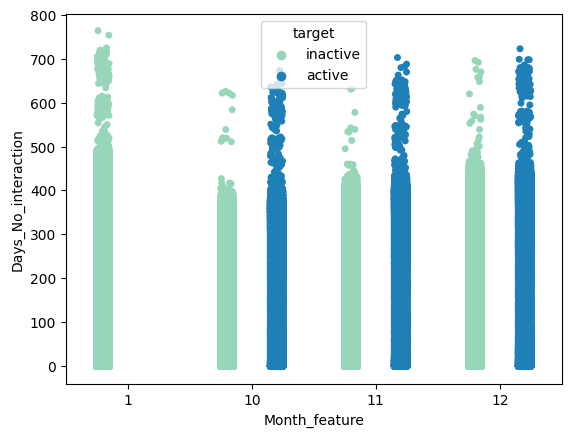

In [112]:
sns.stripplot(x='Month_feature', y='Days_No_interaction',data=filtered_df, hue='target',palette='YlGnBu', dodge=True) 

In [318]:
filtered_df

,target,hashed_user_id,regist_date,is_bind_card,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month,User_Count,Monthly_Spend_Per_Status,Num_Days_Registered,Interactions_Per_Day,Days_No_interaction,Days_No_interaction_Per_month,Month Registered,Year Registered,Year_feature,Month_feature
0,active,1000772633524872632,2022-12-30,0,0.0,0,15,1,2022-12-30,6,0,0,2,1,202212,1,0.0,0,0.000000,-1,-0.033333,12,2022,2022,12
1,inactive,1000772633524872632,2022-12-30,0,0.0,0,11,2,2023-01-20,2,0,0,2,1,202301,1,0.0,21,0.523810,19,0.633333,12,2022,2023,1
2,inactive,1006559301419582051,2022-08-15,0,0.0,0,4,1,2022-12-06,2,0,0,1,0,202212,1,0.0,113,0.035398,112,3.733333,8,2022,2022,12
3,inactive,1006671521575354929,2023-01-03,0,0.0,0,35,1,2023-01-03,17,0,0,3,2,202301,1,0.0,0,0.000000,-1,-0.033333,1,2023,2023,1
4,inactive,1008193142447905044,2021-10-16,1,0.0,0,158,3,2022-11-21,12,0,0,7,5,202211,1,0.0,401,0.394015,398,13.266667,10,2021,2022,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153652,active,996679794252145381,2022-08-15,0,0.0,0,78,3,2022-10-31,16,0,0,3,2,202210,3,0.0,77,1.012987,74,2.466667,8,2022,2022,10
2153653,active,996679794252145381,2022-08-15,0,0.0,0,72,4,2022-11-30,5,0,0,6,5,202211,3,0.0,107,0.672897,103,3.433333,8,2022,2022,11
2153654,active,996679794252145381,2022-08-15,0,0.0,0,40,6,2022-12-31,4,0,0,5,3,202212,3,0.0,138,0.289855,132,4.400000,8,2022,2022,12
2153655,inactive,996679794252145381,2022-08-15,0,0.0,0,19,2,2023-01-28,6,0,0,3,2,202301,1,0.0,166,0.114458,164,5.466667,8,2022,2023,1


In [142]:
filtered_df['is_bind_card'].value_counts()

is_bind_card
0    1420995
1     732662
Name: count, dtype: int64

<Axes: xlabel='year_month', ylabel='Interactions_Per_Day'>

C:\Users\kaudim\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\kaudim\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


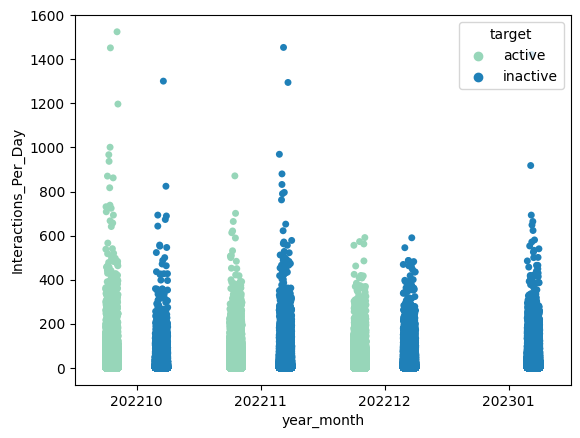

In [139]:
sns.stripplot(x='year_month', y='Interactions_Per_Day',data=filtered_df, hue='target',palette='YlGnBu', dodge=True) 

In [143]:
active_df = filtered_df.query('target=="active"')
inactive_df = filtered_df.query('target=="inactive"')

In [141]:
active_df

,target,hashed_user_id,regist_date,is_bind_card,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,year_month,Num_Days_Registered,Interactions_Per_Day,Days_No_interaction,Days_No_interaction_Per_month,Month Registered,Year Registered,Year_feature,Month_feature
0,active,1000772633524872632,2022-12-30,0,0.0,0,15,1,2022-12-30,6,0,0,2,202212,0,0.000000,-1,-0.033333,12,2022,2022,12
6,active,1020500780636001202,2022-04-07,1,41.0,2,393,17,2022-10-24,20,0,0,4,202210,200,1.965000,183,6.100000,4,2022,2022,10
7,active,1020500780636001202,2022-04-07,1,66.0,3,391,15,2022-11-30,20,0,0,5,202211,237,1.649789,222,7.400000,4,2022,2022,11
8,active,1020500780636001202,2022-04-07,1,12.0,1,241,12,2022-12-25,17,0,0,3,202212,262,0.919847,250,8.333333,4,2022,2022,12
10,active,1025425308758786705,2021-11-21,1,2.0,2,112,5,2022-11-20,17,0,0,1,202211,364,0.307692,359,11.966667,11,2021,2022,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153645,active,986312359246030557,2022-01-24,0,0.0,0,4,1,2022-10-13,3,0,0,1,202210,262,0.015267,261,8.700000,1,2022,2022,10
2153650,active,995434937095420998,2022-12-24,0,0.0,0,158,7,2022-12-31,21,0,0,4,202212,7,22.571429,0,0.000000,12,2022,2022,12
2153652,active,996679794252145381,2022-08-15,0,0.0,0,78,3,2022-10-31,16,0,0,3,202210,77,1.012987,74,2.466667,8,2022,2022,10
2153653,active,996679794252145381,2022-08-15,0,0.0,0,72,4,2022-11-30,5,0,0,6,202211,107,0.672897,103,3.433333,8,2022,2022,11


In [23]:
active_df.describe()

,hashed_user_id,regist_date,is_bind_card,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,year_month,Num_Days_Registered,Interactions_Per_Day,Days_No_interaction,Days_No_interaction_Per_month,Month Registered,Year Registered,Year_feature,Month_feature
count,9.686660e+05,968666,968666.000000,968666.000000,968666.000000,968666.000000,968666.000000,968666,968666.000000,968666.000000,968666.000000,968666.000000,968666.000000,968666.000000,968666.000000,968666.000000,968666.000000,968666.000000,968666.000000,968666.0,968666.000000
mean,4.611476e+18,2022-04-23 01:08:33.843987200,0.463413,78.066437,2.310367,183.602337,6.774579,2022-11-26 05:23:35.573995264,12.526514,0.033365,0.020402,3.208628,202211.073050,217.177103,3.744096,210.402525,7.013417,8.661377,2021.627717,2022.0,11.073050
min,2.004088e+13,2020-12-17 00:00:00,0.000000,0.000000,0.000000,1.000000,1.000000,2022-10-01 00:00:00,1.000000,0.000000,0.000000,0.000000,202210.000000,0.000000,0.000000,-2.000000,-0.066667,1.000000,2020.000000,2022.0,10.000000
25%,2.304590e+18,2021-11-16 00:00:00,0.000000,0.000000,0.000000,23.000000,2.000000,2022-10-31 00:00:00,5.000000,0.000000,0.000000,1.000000,202210.000000,40.000000,0.098039,33.000000,1.100000,7.000000,2021.000000,2022.0,10.000000
50%,4.608726e+18,2022-03-18 00:00:00,0.000000,0.000000,0.000000,72.000000,4.000000,2022-11-29 00:00:00,10.000000,0.000000,0.000000,2.000000,202211.000000,247.000000,0.451128,239.000000,7.966667,10.000000,2022.000000,2022.0,11.000000
75%,6.917534e+18,2022-10-17 00:00:00,1.000000,29.000000,2.000000,214.000000,9.000000,2022-12-23 00:00:00,17.000000,0.000000,0.000000,4.000000,202212.000000,369.000000,1.822639,361.000000,12.033333,11.000000,2022.000000,2022.0,12.000000
max,9.223319e+18,2022-12-31 00:00:00,1.000000,109800.230000,272.000000,44410.000000,31.000000,2022-12-31 00:00:00,167.000000,97.000000,46.000000,88.000000,202212.000000,726.000000,1525.000000,723.000000,24.100000,12.000000,2022.000000,2022.0,12.000000
std,2.662716e+18,NaN,0.498660,367.122699,5.854149,313.586346,7.198033,NaN,10.671091,0.458444,0.224148,2.921978,0.801382,157.952539,14.062182,156.304797,5.210160,3.382023,0.483420,0.0,0.801382


<Axes: xlabel='year_month', ylabel='nr_unique_pages_visited'>

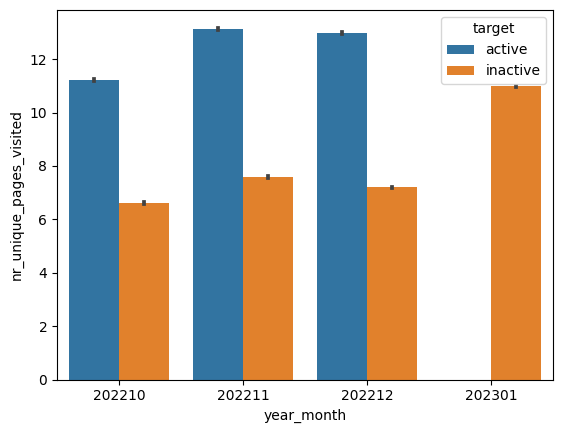

In [145]:
sns.barplot(data=filtered_df,x='year_month',y='nr_unique_pages_visited',hue='target')

In [319]:
filterd_df_no2023 = filtered_df[filtered_df.year_month != 202301] #drop all the 2023 rows

In [320]:
filterd_df_no2023

,target,hashed_user_id,regist_date,is_bind_card,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month,User_Count,Monthly_Spend_Per_Status,Num_Days_Registered,Interactions_Per_Day,Days_No_interaction,Days_No_interaction_Per_month,Month Registered,Year Registered,Year_feature,Month_feature
0,active,1000772633524872632,2022-12-30,0,0.0,0,15,1,2022-12-30,6,0,0,2,1,202212,1,0.0,0,0.000000,-1,-0.033333,12,2022,2022,12
2,inactive,1006559301419582051,2022-08-15,0,0.0,0,4,1,2022-12-06,2,0,0,1,0,202212,1,0.0,113,0.035398,112,3.733333,8,2022,2022,12
4,inactive,1008193142447905044,2021-10-16,1,0.0,0,158,3,2022-11-21,12,0,0,7,5,202211,1,0.0,401,0.394015,398,13.266667,10,2021,2022,11
5,inactive,1008849587519297040,2022-12-18,0,0.0,0,11,1,2022-12-18,4,0,0,2,2,202212,1,0.0,0,0.000000,-1,-0.033333,12,2022,2022,12
6,active,1020500780636001202,2022-04-07,1,41.0,2,393,17,2022-10-24,20,0,0,4,2,202210,3,119.0,200,1.965000,183,6.100000,4,2022,2022,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153650,active,995434937095420998,2022-12-24,0,0.0,0,158,7,2022-12-31,21,0,0,4,3,202212,1,0.0,7,22.571429,0,0.000000,12,2022,2022,12
2153652,active,996679794252145381,2022-08-15,0,0.0,0,78,3,2022-10-31,16,0,0,3,2,202210,3,0.0,77,1.012987,74,2.466667,8,2022,2022,10
2153653,active,996679794252145381,2022-08-15,0,0.0,0,72,4,2022-11-30,5,0,0,6,5,202211,3,0.0,107,0.672897,103,3.433333,8,2022,2022,11
2153654,active,996679794252145381,2022-08-15,0,0.0,0,40,6,2022-12-31,4,0,0,5,3,202212,3,0.0,138,0.289855,132,4.400000,8,2022,2022,12


<Axes: xlabel='year_month', ylabel='nr_unique_pages_visited'>

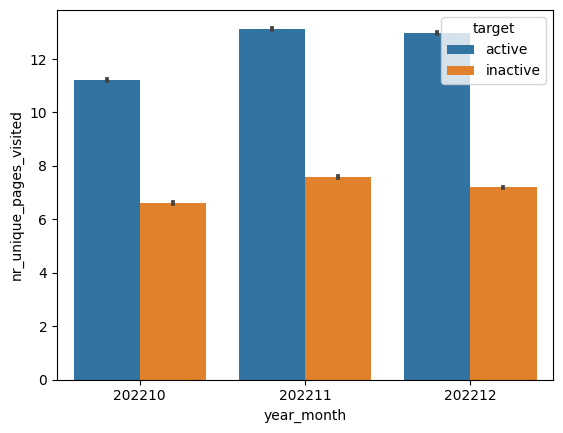

In [155]:
sns.barplot(data=filterd_df_no2023,x='year_month',y='nr_unique_pages_visited',hue='target')

<Axes: xlabel='year_month', ylabel='nr_unique_pages_visited'>

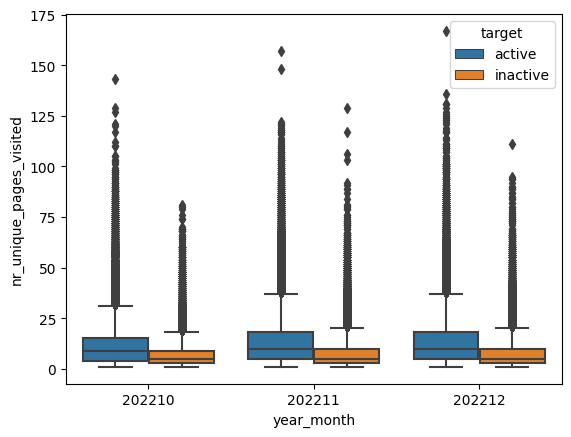

In [158]:
sns.boxplot(data=filterd_df_no2023,x='year_month',y='nr_unique_pages_visited',hue='target')

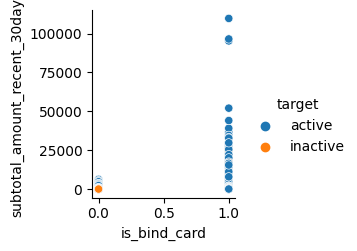

In [163]:
sns.pairplot(
    filterd_df_no2023,
    x_vars=["is_bind_card"],
    y_vars=["subtotal_amount_recent_30days"],
    hue = 'target')

<Axes: xlabel='is_bind_card', ylabel='subtotal_amount_recent_30days'>

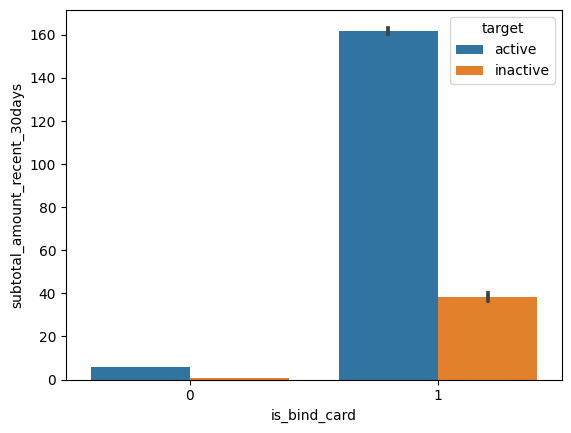

In [164]:
sns.barplot(data=filterd_df_no2023,x='is_bind_card',y='subtotal_amount_recent_30days',hue='target')

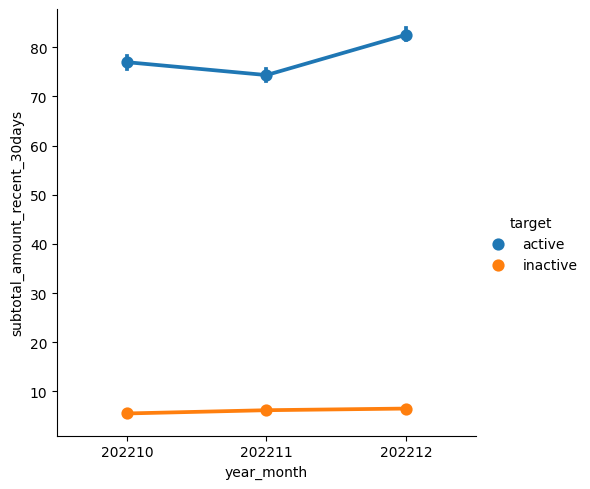

In [166]:
sns.catplot(data=filterd_df_no2023,x='year_month',y='subtotal_amount_recent_30days',hue='target',kind='point')

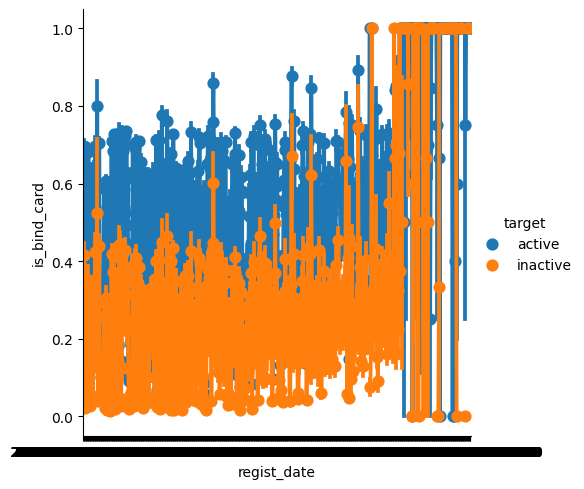

In [170]:
#cols_to_plot = inactive_df.columns['regist_date','is_bind_card'].tolist()
sns.catplot(data=filterd_df_no2023,x='regist_date',y='is_bind_card',hue='target',kind='point')

In [36]:
inactive_df

,Unnamed: 0,target,hashed_user_id,regist_date,is_bind_card,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,year_month,Num_Days_Registered,Interactions_Per_Day,Days_No_interaction,Days_No_interaction_Per_month,Month Registered,Year Registered,Year_feature,Month_feature
1,1,inactive,-1000772633524872632,2022-12-30,0,0.0,0,11,2,2023-01-20,2,0,0,2,202301,21,0.523810,19,0.633333,12,2022,2023,1
2,2,inactive,-1006559301419582051,2022-08-15,0,0.0,0,4,1,2022-12-06,2,0,0,1,202212,113,0.035398,112,3.733333,8,2022,2022,12
3,3,inactive,-1006671521575354929,2023-01-03,0,0.0,0,35,1,2023-01-03,17,0,0,3,202301,0,0.000000,-1,-0.033333,1,2023,2023,1
4,4,inactive,-1008193142447905044,2021-10-16,1,0.0,0,158,3,2022-11-21,12,0,0,7,202211,401,0.394015,398,13.266667,10,2021,2022,11
5,5,inactive,-1008849587519297040,2022-12-18,0,0.0,0,11,1,2022-12-18,4,0,0,2,202212,0,0.000000,-1,-0.033333,12,2022,2022,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153648,2153648,inactive,988428083120216943,2022-10-05,0,0.0,0,4,1,2022-10-05,2,0,0,1,202210,0,0.000000,-1,-0.033333,10,2022,2022,10
2153649,2153649,inactive,9914771273659435,2023-01-30,0,0.0,0,16,2,2023-01-31,6,0,0,2,202301,1,16.000000,-1,-0.033333,1,2023,2023,1
2153651,2153651,inactive,995434937095420998,2022-12-24,0,0.0,0,13,2,2023-01-02,3,0,0,2,202301,9,1.444444,7,0.233333,12,2022,2023,1
2153655,2153655,inactive,996679794252145381,2022-08-15,0,0.0,0,19,2,2023-01-28,6,0,0,3,202301,166,0.114458,164,5.466667,8,2022,2023,1


In [24]:
inactive_df.describe()

,hashed_user_id,regist_date,is_bind_card,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,year_month,Num_Days_Registered,Interactions_Per_Day,Days_No_interaction,Days_No_interaction_Per_month,Month Registered,Year Registered,Year_feature,Month_feature
count,1.184991e+06,1184991,1.184991e+06,1.184991e+06,1.184991e+06,1.184991e+06,1.184991e+06,1184991,1.184991e+06,1.184991e+06,1.184991e+06,1.184991e+06,1.184991e+06,1.184991e+06,1.184991e+06,1.184991e+06,1.184991e+06,1.184991e+06,1.184991e+06,1.184991e+06,1.184991e+06
mean,4.612132e+18,2022-07-23 13:10:42.490955264,2.394702e-01,3.058168e+01,1.096573e+00,8.900712e+01,4.068422e+00,2022-12-27 01:12:50.560787712,9.319780e+00,6.269415e-02,3.859270e-02,2.495851e+00,2.022615e+05,1.565015e+02,3.602794e+00,1.524331e+02,5.081102e+00,7.873753e+00,2.021944e+03,2.022559e+03,5.518546e+00
min,1.969961e+13,2020-12-17 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2022-10-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.022100e+05,0.000000e+00,0.000000e+00,-2.000000e+00,-6.666667e-02,1.000000e+00,2.020000e+03,2.022000e+03,1.000000e+00
25%,2.305779e+18,2022-02-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+00,2022-12-02 00:00:00,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.022120e+05,2.000000e+00,9.569378e-03,-1.000000e+00,-3.333333e-02,3.000000e+00,2.022000e+03,2.022000e+03,1.000000e+00
50%,4.610392e+18,2022-10-16 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+01,2.000000e+00,2023-01-07 00:00:00,6.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.023010e+05,6.300000e+01,1.415094e-01,5.800000e+01,1.933333e+00,1.000000e+01,2.022000e+03,2.023000e+03,1.000000e+00
75%,6.919625e+18,2022-12-14 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,7.700000e+01,4.000000e+00,2023-01-27 00:00:00,1.200000e+01,0.000000e+00,0.000000e+00,3.000000e+00,2.023010e+05,3.310000e+02,1.181818e+00,3.260000e+02,1.086667e+01,1.100000e+01,2.022000e+03,2.023000e+03,1.100000e+01
max,9.223346e+18,2023-01-31 00:00:00,1.000000e+00,1.035687e+05,2.470000e+02,4.654100e+04,3.100000e+01,2023-01-31 00:00:00,1.940000e+02,1.680000e+02,6.200000e+01,9.000000e+01,2.023010e+05,7.670000e+02,1.454000e+03,7.640000e+02,2.546667e+01,1.200000e+01,2.023000e+03,2.023000e+03,1.200000e+01
std,2.663579e+18,NaN,4.267603e-01,2.342071e+02,4.537895e+00,2.019809e+02,5.982104e+00,NaN,8.946128e+00,6.354442e-01,2.883767e-01,2.273340e+00,4.455783e+01,1.721566e+02,1.439906e+01,1.706240e+02,5.687467e+00,4.233969e+00,6.133282e-01,4.964613e-01,5.116846e+00


<Axes: xlabel='year_month'>

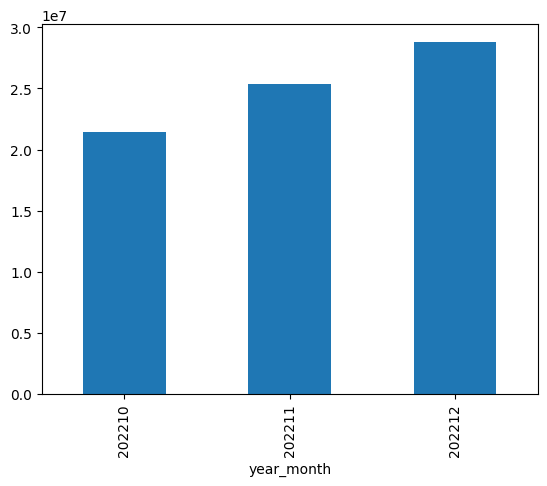

In [41]:
active_df.groupby('year_month')['subtotal_amount_recent_30days'].sum().plot(kind='bar')

In [85]:
active_df.dtypes

Unnamed: 0                                    int64
target                                       object
hashed_user_id                                int64
regist_date                          datetime64[ns]
is_bind_card                                  int64
subtotal_amount_recent_30days               float64
subtotal_ordercount_recent_30days             int64
nr_interactions                               int64
nr_days_interacted                            int64
max_date_time                        datetime64[ns]
nr_unique_pages_visited                       int64
search_events                                 int64
unique_search_terms                           int64
unique_app_visits                             int64
year_month                                    int64
Num_Days_Registered                           int64
Interactions_Per_Day                        float64
Days_No_interaction                           int64
Days_No_interaction_Per_month               float64
Month Regist

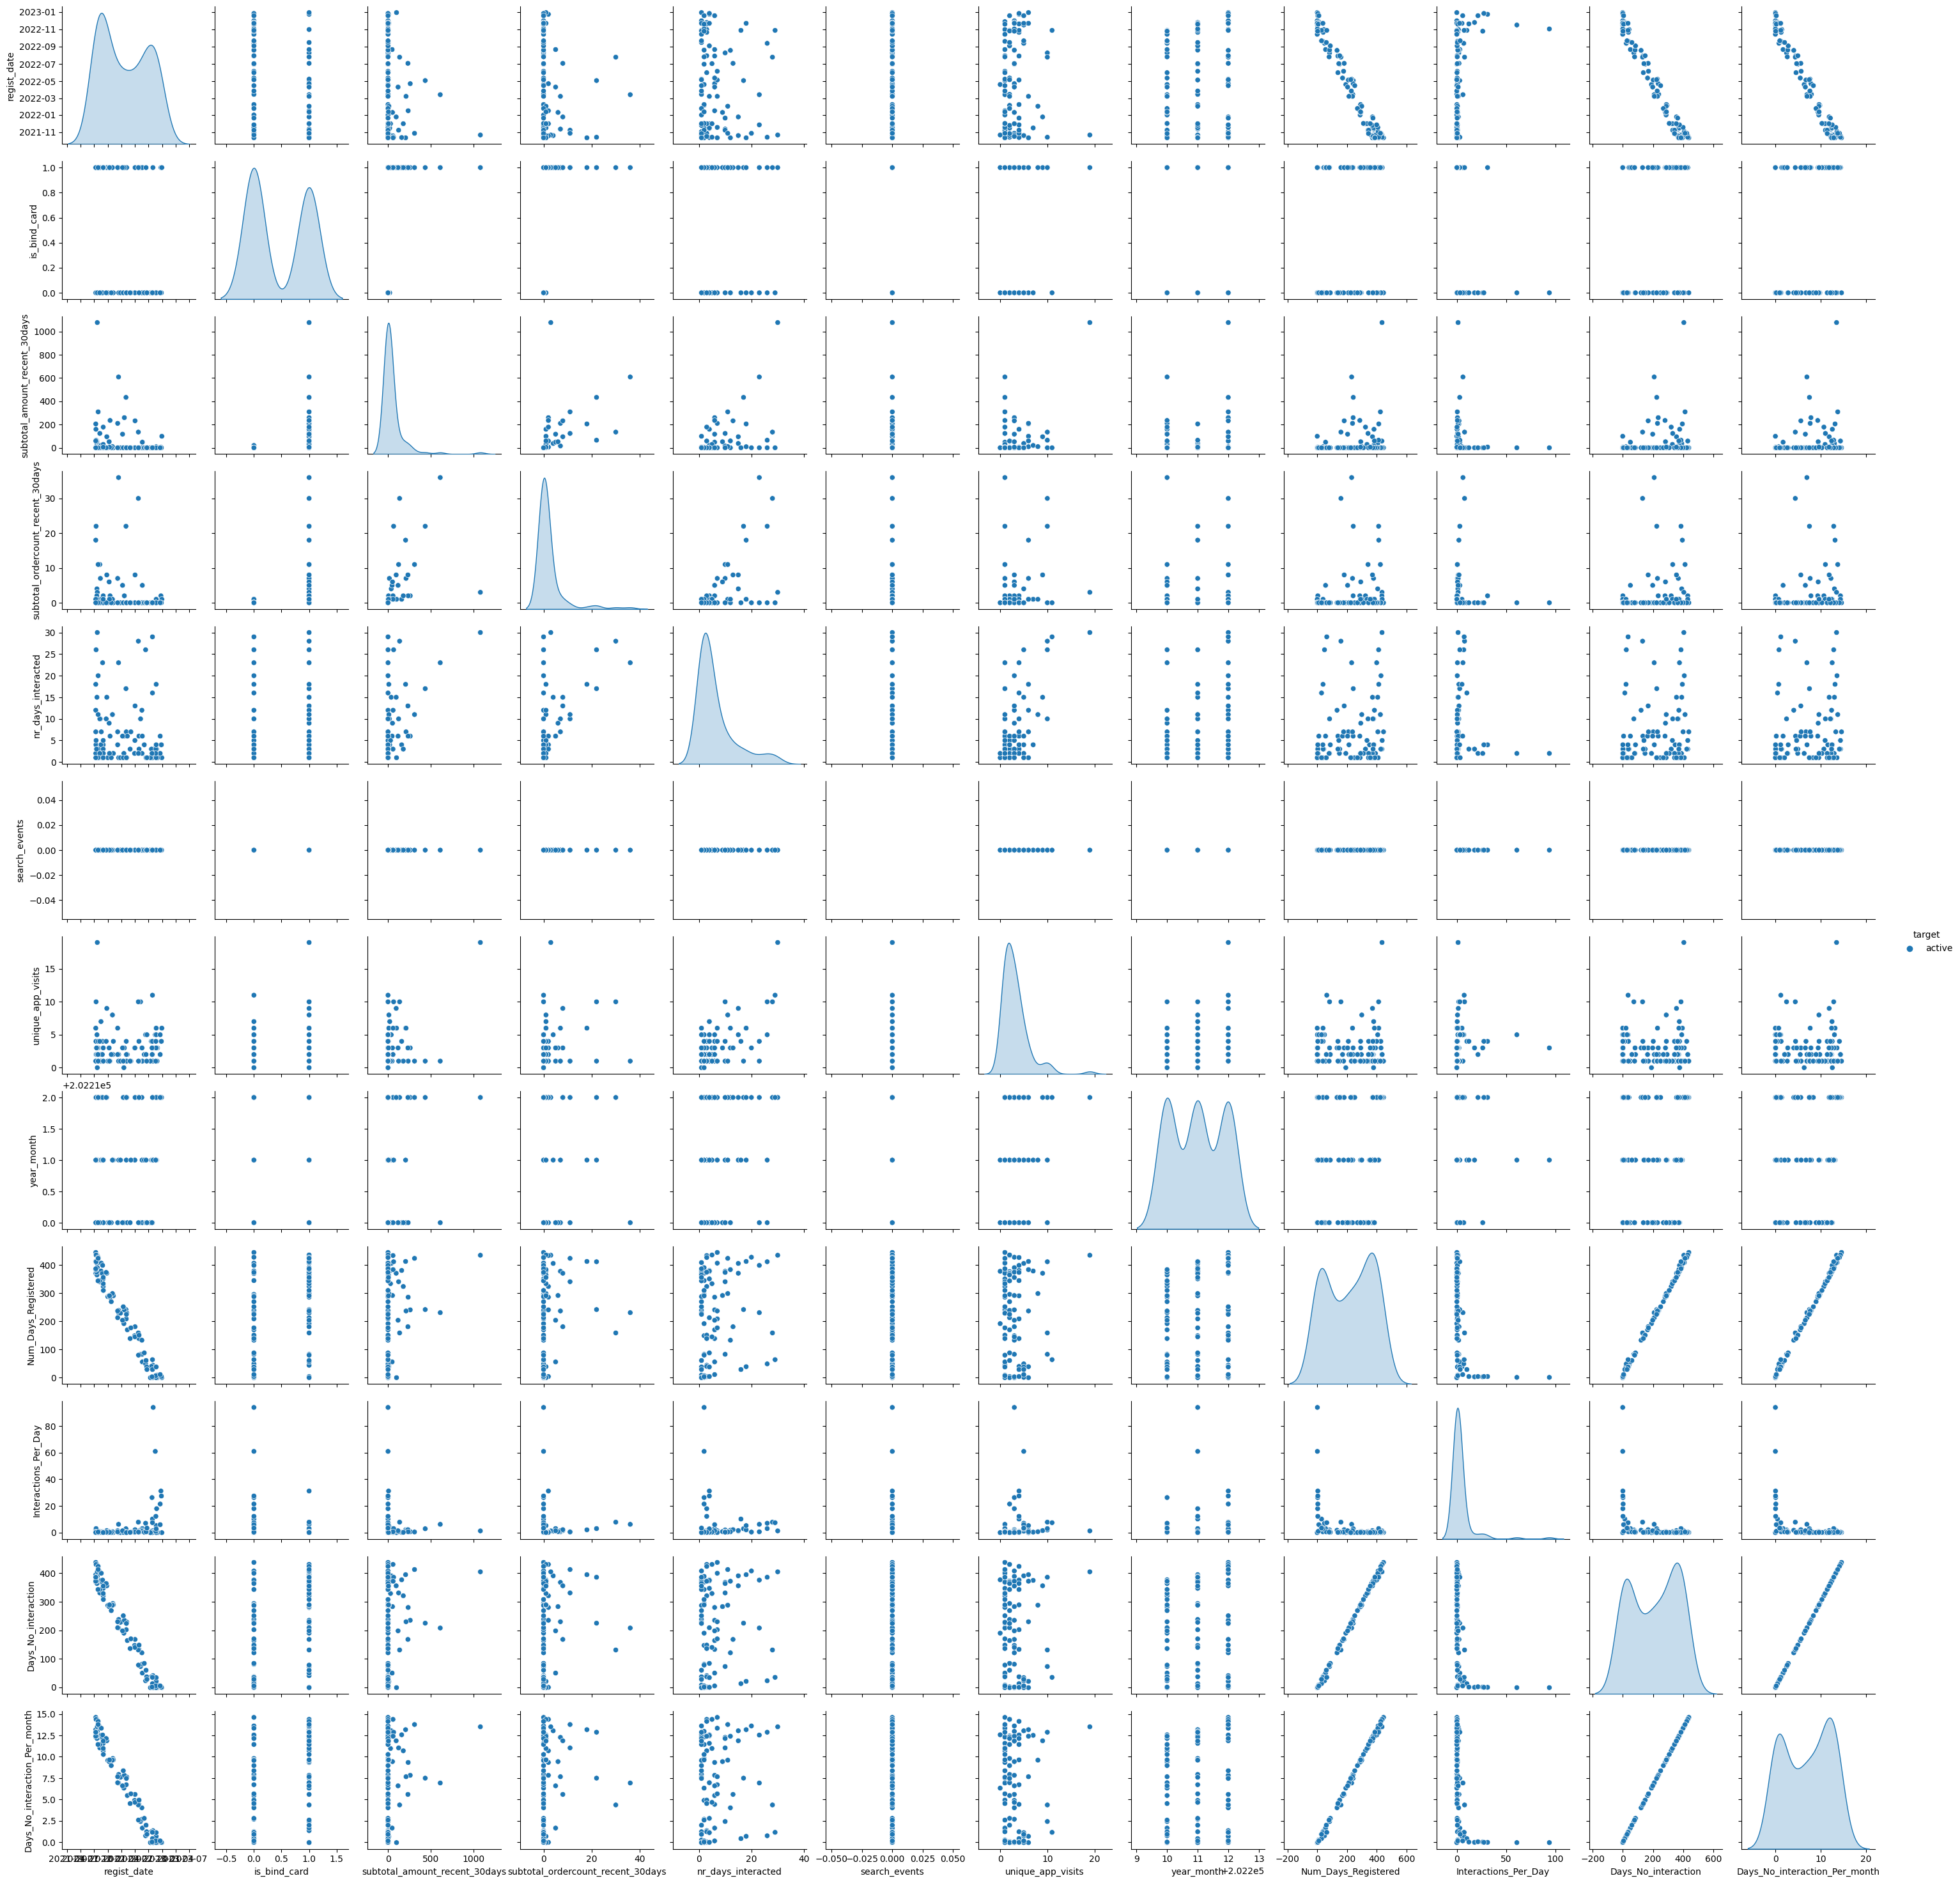

In [86]:
#cols_to_plot = active_df.columns[1:6].tolist()
sns.pairplot(active_df.sample(100), vars = ['regist_date', 'is_bind_card',
       'subtotal_amount_recent_30days', 'subtotal_ordercount_recent_30days',
       'nr_days_interacted', 'search_events', 
       'unique_app_visits', 'year_month', 'Num_Days_Registered',
       'Interactions_Per_Day', 'Days_No_interaction',
       'Days_No_interaction_Per_month'],hue='target')

In [101]:
active_df.columns

Index(['Unnamed: 0', 'target', 'hashed_user_id', 'regist_date', 'is_bind_card',
       'subtotal_amount_recent_30days', 'subtotal_ordercount_recent_30days',
       'nr_interactions', 'nr_days_interacted', 'max_date_time',
       'nr_unique_pages_visited', 'search_events', 'unique_search_terms',
       'unique_app_visits', 'year_month', 'Num_Days_Registered',
       'Interactions_Per_Day', 'Days_No_interaction',
       'Days_No_interaction_Per_month', 'Month Registered', 'Year Registered',
       'Year_feature', 'Month_feature'],
      dtype='object')

In [103]:
active_df[['hashed_user_id', 'regist_date', 'is_bind_card',
       'subtotal_amount_recent_30days', 'subtotal_ordercount_recent_30days',
       'nr_interactions', 'nr_days_interacted', 'max_date_time',
       'nr_unique_pages_visited', 'search_events', 'unique_search_terms',
       'unique_app_visits', 'year_month', 'Num_Days_Registered',
       'Interactions_Per_Day', 'Days_No_interaction',
       'Days_No_interaction_Per_month', 'Month Registered', 'Year Registered',
       'Year_feature', 'Month_feature']].dropna().corr()

,hashed_user_id,regist_date,is_bind_card,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,year_month,Num_Days_Registered,Interactions_Per_Day,Days_No_interaction,Days_No_interaction_Per_month,Month Registered,Year Registered,Year_feature,Month_feature
hashed_user_id,1.000000,-0.000575,-0.001085,-0.001066,-0.000230,0.000489,0.000454,-0.000016,0.000503,-0.000434,-0.001758,0.000884,0.000512,0.000575,0.000219,0.000560,0.000560,0.000637,-0.000790,NaN,0.000512
regist_date,-0.000575,1.000000,-0.438926,-0.103510,-0.176029,-0.169053,-0.208103,0.112698,-0.069722,0.015735,0.019456,-0.024060,0.141035,-0.986658,0.286784,-0.987475,-0.987475,0.136926,0.813573,NaN,0.141035
is_bind_card,-0.001085,-0.438926,1.000000,0.211690,0.368703,0.335300,0.300838,0.014172,0.313610,0.001479,0.000402,0.096751,-0.038253,0.443497,-0.057201,0.434318,0.434318,-0.161594,-0.297189,NaN,-0.038253
subtotal_amount_recent_30days,-0.001066,-0.103510,0.211690,1.000000,0.317757,0.282854,0.204627,0.039173,0.255094,0.024309,0.024381,0.140222,0.006569,0.110459,0.004605,0.102200,0.102200,-0.032696,-0.073241,NaN,0.006569
subtotal_ordercount_recent_30days,-0.000230,-0.176029,0.368703,0.317757,1.000000,0.755628,0.553443,0.129056,0.442922,0.010968,0.013634,0.151836,0.058026,0.198077,0.054334,0.174679,0.174679,-0.074356,-0.113041,NaN,0.058026
nr_interactions,0.000489,-0.169053,0.335300,0.282854,0.755628,1.000000,0.699635,0.107107,0.634565,0.038007,0.042105,0.399035,0.013943,0.187469,0.129797,0.157226,0.157226,-0.053857,-0.118221,NaN,0.013943
nr_days_interacted,0.000454,-0.208103,0.300838,0.204627,0.553443,0.699635,1.000000,0.252286,0.489434,0.034536,0.039946,0.421314,0.122689,0.250507,0.022905,0.207097,0.207097,-0.037798,-0.161288,NaN,0.122689
max_date_time,-0.000016,0.112698,0.014172,0.039173,0.129056,0.107107,0.252286,1.000000,0.157049,0.081324,0.100350,0.164696,0.953316,0.050577,0.024173,0.039492,0.039492,0.117422,0.031960,NaN,0.953316
nr_unique_pages_visited,0.000503,-0.069722,0.313610,0.255094,0.442922,0.634565,0.489434,0.157049,1.000000,0.093854,0.108592,0.555474,0.063221,0.095812,0.232163,0.074283,0.074283,0.003540,-0.062506,NaN,0.063221
search_events,-0.000434,0.015735,0.001479,0.024309,0.010968,0.038007,0.034536,0.081324,0.093854,1.000000,0.807125,0.111721,0.077695,-0.002491,0.031598,-0.004107,-0.004107,0.018490,0.003476,NaN,0.077695


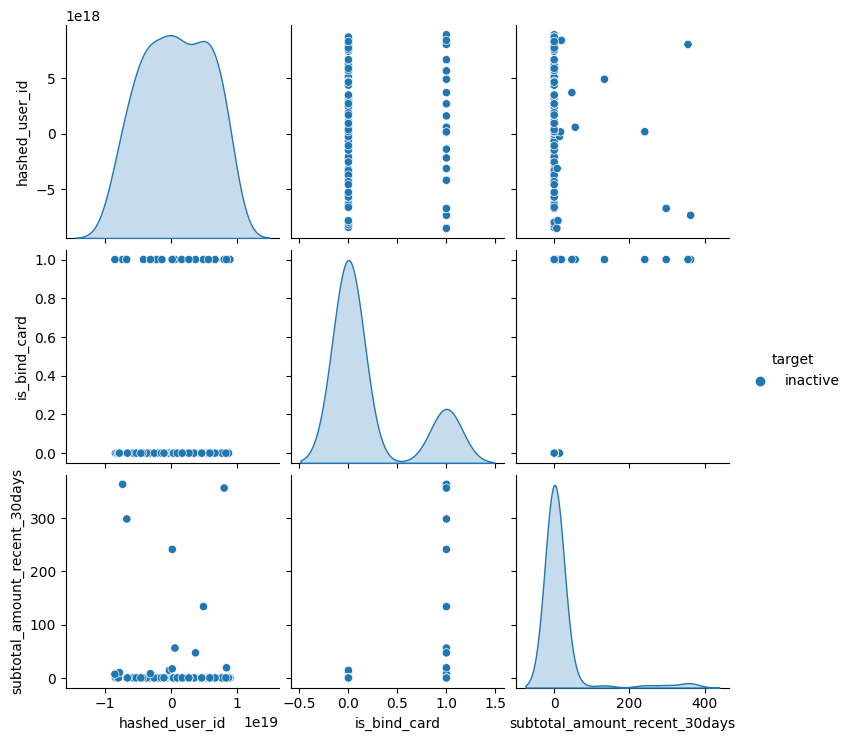

In [70]:
cols_to_plot = inactive_df.columns[1:6].tolist()
sns.pairplot(inactive_df[cols_to_plot].sample(100), hue='target')

<Axes: >

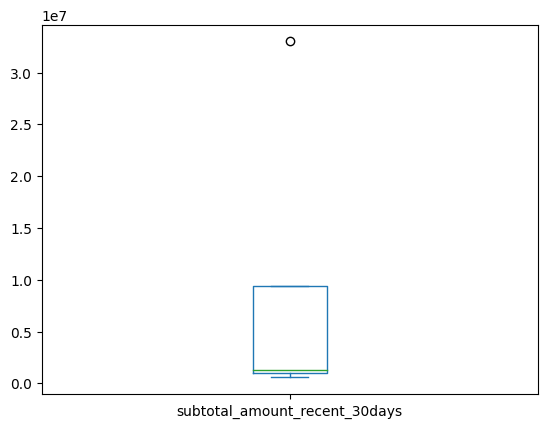

In [46]:
inactive_df.groupby('year_month')['subtotal_amount_recent_30days'].sum().plot(kind='box') #look for outliers

<Axes: >

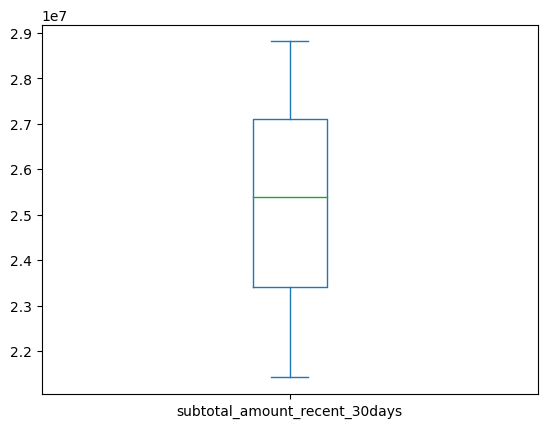

In [21]:
active_df.groupby('year_month')['subtotal_amount_recent_30days'].sum().plot(kind='box') #look for outliers

In [51]:
inactive_df.query('subtotal_amount_recent_30days>100000')

,Unnamed: 0,target,hashed_user_id,regist_date,is_bind_card,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,year_month,Num_Days_Registered,Interactions_Per_Day,Days_No_interaction,Days_No_interaction_Per_month,Month Registered,Year Registered,Year_feature,Month_feature
1976647,1976647,inactive,-8999309118655251227,2021-10-12,1,103568.68,18,362,12,2023-01-28,38,0,0,8,202301,473,0.765328,461,15.366667,10,2021,2023,1


<Axes: xlabel='year_month'>

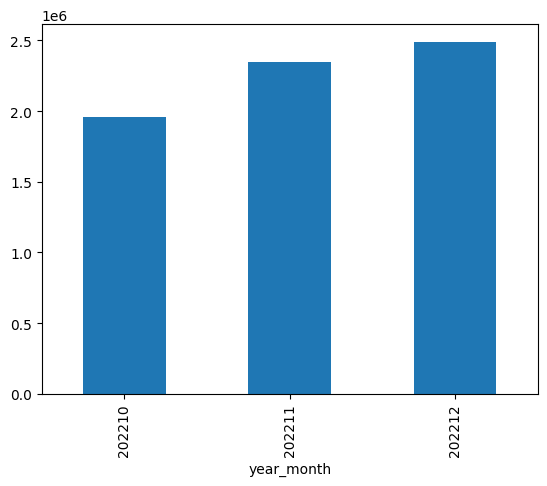

In [39]:
active_df.groupby('year_month')['Days_No_interaction_Per_month'].sum().plot(kind='bar')

<Axes: xlabel='year_month'>

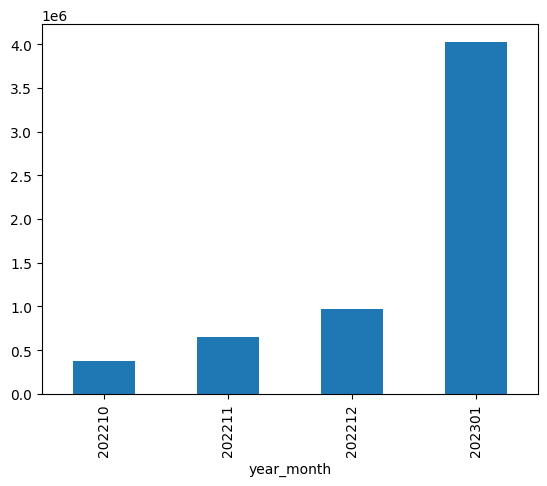

In [38]:
inactive_df.groupby('year_month')['Days_No_interaction_Per_month'].sum().plot(kind='bar')

In [ ]:
inactive_df_no_outlier.drop

<Axes: xlabel='target'>

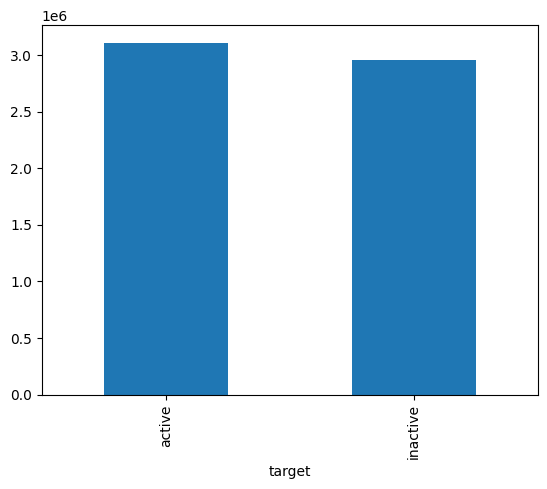

In [73]:
filtered_df.groupby('target')['unique_app_visits'].sum().plot(kind='bar')

In [56]:
#view the actual rows that are duplicate by the subset columns mentioned
duplicated_rows = df.duplicated(subset =['hashed_user_id', 'regist_date'])
df.loc[duplicated_rows]


False    1184991
True      968666
Name: count, dtype: int64

In [10]:
df.dtypes

Unnamed: 0                             int64
target                                object
hashed_user_id                         int64
regist_date                           object
is_bind_card                           int64
lastorder_usecase                     object
lastorder_platform                    object
lastorder_orderdate                   object
subtotal_amount_today_daily          float64
subtotal_amount_recent_7days         float64
subtotal_amount_recent_30days        float64
subtotal_ordercount_today_daily        int64
subtotal_ordercount_recent_7days       int64
subtotal_ordercount_recent_30days      int64
nr_interactions                        int64
nr_days_interacted                     int64
max_date_time                         object
nr_unique_pages_visited                int64
search_events                          int64
unique_search_terms                    int64
unique_app_visits                      int64
unique_app_category_visits             int64
year_month

In [11]:
df.columns

Index(['Unnamed: 0', 'target', 'hashed_user_id', 'regist_date', 'is_bind_card',
       'lastorder_usecase', 'lastorder_platform', 'lastorder_orderdate',
       'subtotal_amount_today_daily', 'subtotal_amount_recent_7days',
       'subtotal_amount_recent_30days', 'subtotal_ordercount_today_daily',
       'subtotal_ordercount_recent_7days', 'subtotal_ordercount_recent_30days',
       'nr_interactions', 'nr_days_interacted', 'max_date_time',
       'nr_unique_pages_visited', 'search_events', 'unique_search_terms',
       'unique_app_visits', 'unique_app_category_visits', 'year_month'],
      dtype='object')

In [17]:
#trying to combine duplicated rows, where values aree numerical add them and where are dates choose latest date
new_df = df
new_df['Combined_7_days'] = df.groupby('hashed_user_id')['subtotal_amount_recent_7days'].sum()
new_df

,Unnamed: 0,target,hashed_user_id,regist_date,is_bind_card,lastorder_usecase,lastorder_platform,lastorder_orderdate,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month,Combined_7_days
0,0,active,-1000772633524872632,2022-12-30,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,15,1,2022-12-30,6,0,0,2,1,202212,NaN
1,1,inactive,-1000772633524872632,2022-12-30,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,11,2,2023-01-20,2,0,0,2,1,202301,NaN
2,2,inactive,-1006559301419582051,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,4,1,2022-12-06,2,0,0,1,0,202212,NaN
3,3,inactive,-1006671521575354929,2023-01-03,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,35,1,2023-01-03,17,0,0,3,2,202301,NaN
4,4,inactive,-1008193142447905044,2021-10-16,1,-1,-1,NaN,0.0,0.0,0.0,0,0,0,158,3,2022-11-21,12,0,0,7,5,202211,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153652,2153652,active,996679794252145381,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,78,3,2022-10-31,16,0,0,3,2,202210,NaN
2153653,2153653,active,996679794252145381,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,72,4,2022-11-30,5,0,0,6,5,202211,NaN
2153654,2153654,active,996679794252145381,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,40,6,2022-12-31,4,0,0,5,3,202212,NaN
2153655,2153655,inactive,996679794252145381,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,19,2,2023-01-28,6,0,0,3,2,202301,NaN


In [54]:
df['hashed_user_id'] = df['hashed_user_id'].abs()

In [337]:
filtered_df_no2023ndates = filterd_df_no2023.drop(columns=['regist_date','max_date_time',
                                                           'hashed_user_id','Days_No_interaction',
                                                           'Days_No_interaction_Per_month',
                                                           'Month Registered', 'Year Registered',
                                                           'Year_feature', 'Month_feature','year_month','search_events',
                                                           'unique_search_terms', 'Interactions_Per_Day'])

In [323]:
filtered_df_no2023ndates.columns

Index(['target', 'is_bind_card', 'subtotal_amount_recent_30days',
       'subtotal_ordercount_recent_30days', 'nr_interactions',
       'nr_days_interacted', 'nr_unique_pages_visited', 'unique_app_visits',
       'unique_app_category_visits', 'User_Count', 'Monthly_Spend_Per_Status',
       'Num_Days_Registered', 'Interactions_Per_Day'],
      dtype='object')

In [339]:
filtered_df_no2023ndates['target'] = filtered_df_no2023ndates['target'].map({'active': 1, 'inactive': 0})

In [325]:
filtered_df_no2023ndates['interaction_rate'] = filtered_df_no2023ndates['nr_interactions'] / filtered_df_no2023ndates['nr_days_interacted']

In [326]:
filtered_df_no2023ndates.head()

,target,is_bind_card,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,nr_unique_pages_visited,unique_app_visits,unique_app_category_visits,User_Count,Monthly_Spend_Per_Status,Num_Days_Registered,Interactions_Per_Day,interaction_rate
0,1,0,0.0,0,15,1,6,2,1,1,0.0,0,0.000000,15.000000
2,0,0,0.0,0,4,1,2,1,0,1,0.0,113,0.035398,4.000000
4,0,1,0.0,0,158,3,12,7,5,1,0.0,401,0.394015,52.666667
5,0,0,0.0,0,11,1,4,2,2,1,0.0,0,0.000000,11.000000
6,1,1,41.0,2,393,17,20,4,2,3,119.0,200,1.965000,23.117647


In [327]:
filtered_df_no2023ndates.columns

Index(['target', 'is_bind_card', 'subtotal_amount_recent_30days',
       'subtotal_ordercount_recent_30days', 'nr_interactions',
       'nr_days_interacted', 'nr_unique_pages_visited', 'unique_app_visits',
       'unique_app_category_visits', 'User_Count', 'Monthly_Spend_Per_Status',
       'Num_Days_Registered', 'Interactions_Per_Day', 'interaction_rate'],
      dtype='object')

In [340]:
filtered_df_no2023ndates.corr()['target']

target                               1.000000
is_bind_card                         0.322269
subtotal_amount_recent_30days        0.112878
subtotal_ordercount_recent_30days    0.211414
nr_interactions                      0.261057
nr_days_interacted                   0.371407
nr_unique_pages_visited              0.259187
unique_app_visits                    0.225698
unique_app_category_visits           0.231090
User_Count                           0.647653
Monthly_Spend_Per_Status             0.131136
Num_Days_Registered                  0.296306
Name: target, dtype: float64

In [342]:
#split the data inot the training and the testing data, allocate 80% of the data for training
#training_data = filterd_df_no2023.sample(frac=0.8, random_state=25)
#testing_data = filterd_df_no2023.drop(training_data.index)

training_data = filtered_df_no2023ndates.sample(frac=0.8, random_state=25)
testing_data = filtered_df_no2023ndates.drop(training_data.index)

In [51]:
training_data['regist_date'] = training_data['regist_date'].astype('object')
training_data['max_date_time'] = training_data['max_date_time'].astype('object')
testing_data['regist_date'] = testing_data['regist_date'].astype('object')
testing_data['max_date_time'] = testing_data['max_date_time'].astype('object')

KeyError: 'regist_date'

In [226]:
training_data #show the training data Dataframe

,target,is_bind_card,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month,Num_Days_Registered,Interactions_Per_Day,Year_feature,Month_feature,interaction_rate
115098,1,0,0.0,0,21,2,7,0,0,3,2,202210,4,5.250000,2022,10,10.500000
938333,1,0,0.0,0,1,1,1,0,0,1,0,202210,0,0.000000,2022,10,1.000000
1340384,1,0,0.0,0,172,6,22,0,0,8,4,202212,235,0.731915,2022,12,28.666667
1745478,1,1,398.0,9,1168,16,14,0,0,3,2,202211,144,8.111111,2022,11,73.000000
1843422,0,0,0.0,0,8,1,1,0,0,1,1,202211,88,0.090909,2022,11,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293455,1,0,0.0,0,1,1,1,0,0,0,0,202211,393,0.002545,2022,11,1.000000
687217,1,0,0.0,0,230,20,15,0,0,4,3,202211,20,11.500000,2022,11,11.500000
585091,1,1,0.0,0,255,21,12,0,0,7,4,202212,331,0.770393,2022,12,12.142857
1461288,0,0,0.0,0,52,3,7,0,0,3,2,202211,383,0.135770,2022,11,17.333333


In [227]:
training_data.dtypes

target                                 int64
is_bind_card                           int64
subtotal_amount_recent_30days        float64
subtotal_ordercount_recent_30days      int64
nr_interactions                        int64
nr_days_interacted                     int64
nr_unique_pages_visited                int64
search_events                          int64
unique_search_terms                    int64
unique_app_visits                      int64
unique_app_category_visits             int64
year_month                             int64
Num_Days_Registered                    int64
Interactions_Per_Day                 float64
Year_feature                           int32
Month_feature                          int32
interaction_rate                     float64
dtype: object

In [209]:
testing_data #show the training data Dataframe

,target,is_bind_card,subtotal_amount_recent_30days,nr_interactions
2,0,0,0.0,4
7,1,1,66.0,391
18,1,1,667.0,428
23,0,0,0.0,24
27,1,0,0.0,27
...,...,...,...,...
2153608,0,0,0.0,23
2153626,1,0,0.0,89
2153634,0,0,0.0,45
2153637,0,0,0.0,18


In [55]:
testing_data.dtypes

target                                object
hashed_user_id                         int64
is_bind_card                           int64
subtotal_amount_recent_30days        float64
subtotal_ordercount_recent_30days      int64
nr_interactions                        int64
nr_days_interacted                     int64
nr_unique_pages_visited                int64
search_events                          int64
unique_search_terms                    int64
unique_app_visits                      int64
year_month                             int64
Num_Days_Registered                    int64
Interactions_Per_Day                 float64
Days_No_interaction                    int64
Days_No_interaction_Per_month        float64
Month Registered                       int32
Year Registered                        int32
Year_feature                           int32
Month_feature                          int32
dtype: object

In [343]:
#split the data by removing the target(column to predict) This will be the input dataset
X = training_data.drop(columns=['target']) 

In [57]:
X #show the new data

,hashed_user_id,is_bind_card,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,year_month,Num_Days_Registered,Interactions_Per_Day,Days_No_interaction,Days_No_interaction_Per_month,Month Registered,Year Registered,Year_feature,Month_feature
115098,4346617482727268191,0,0.0,0,21,2,7,0,0,3,202210,4,5.250000,2,0.066667,10,2022,2022,10
938333,995448355238447667,0,0.0,0,1,1,1,0,0,1,202210,0,0.000000,-1,-0.033333,10,2022,2022,10
1340384,6831192996075246687,0,0.0,0,172,6,22,0,0,8,202212,235,0.731915,229,7.633333,5,2022,2022,12
1745478,8380258769050766964,1,398.0,9,1168,16,14,0,0,3,202211,144,8.111111,128,4.266667,7,2022,2022,11
1843422,2796473499682726768,0,0.0,0,8,1,1,0,0,1,202211,88,0.090909,87,2.900000,8,2022,2022,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293455,4684902327511233053,0,0.0,0,1,1,1,0,0,0,202211,393,0.002545,392,13.066667,10,2021,2022,11
687217,2858077081841190207,0,0.0,0,230,20,15,0,0,4,202211,20,11.500000,0,0.000000,11,2022,2022,11
585091,3903651483163875890,1,0.0,0,255,21,12,0,0,7,202212,331,0.770393,310,10.333333,2,2022,2022,12
1461288,2948264368314965503,0,0.0,0,52,3,7,0,0,3,202211,383,0.135770,380,12.666667,10,2021,2022,11


In [344]:
y = training_data['target'] #the data set with the predictions or the answers

In [345]:
y #show the data

115098     1
938333     1
1340384    1
1745478    1
1843422    0
          ..
293455     1
687217     1
585091     1
1461288    0
1735213    1
Name: target, Length: 1192634, dtype: int64

In [346]:
#split the data into the training and the testing data, allocate 80% of the data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [347]:
X_train

,is_bind_card,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,nr_unique_pages_visited,unique_app_visits,unique_app_category_visits,User_Count,Monthly_Spend_Per_Status,Num_Days_Registered
648956,1,648.0,22,982,22,57,1,0,3,1064.0,369
105845,0,0.0,0,23,1,6,4,2,1,0.0,264
1466287,0,0.0,0,9,1,3,2,1,1,0.0,78
1661716,1,2.0,2,295,12,24,7,4,3,13.0,47
1583028,0,0.0,0,14,2,4,2,1,1,0.0,387
...,...,...,...,...,...,...,...,...,...,...,...
1086646,0,0.0,0,19,2,8,2,1,1,0.0,13
363382,0,0.0,0,45,1,16,2,1,1,0.0,0
71652,0,0.0,0,28,2,7,5,4,1,0.0,428
1227989,0,0.0,0,18,1,5,4,2,2,0.0,0


In [348]:
#training the model with DecisionTreeClassifier
model = DecisionTreeClassifier() 
model.fit(X_train,y_train)
prediction = model.predict(X_test) #Run the model against the test data
score = accuracy_score(y_test, prediction) #calcucalte and show the accuracy of the model, score if between 0 and 1
score

0.8153248898447555

In [ ]:
#Show the decision tree in a graph format. Need to view in Viscode
tree-export_graphviz(model, out_file='User_Active_Predictor.dot', feature_names=  , 
                     class_names=sorted(y.unique()), label='all', rounded=True,
                    filled=True)

In [74]:
joblib.dump(model, 'User_Active_Next_Month_Predictor.joblib') #Save the prediction model to a file

['User_Active_Next_Month_Predictor.joblib']

In [66]:
joblib.load('User_Active_Next_Month_Predictor.joblib') #load the prediction model

DecisionTreeClassifier()

In [349]:
### Classification report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

rfc_predict_test = (model.predict_proba(X_test[X.columns])[:,1] >= 0.288).astype(bool)
rfc_cv_score = cross_val_score(model, X_test[X.columns], y_test, cv=5, scoring='roc_auc')

print("=== Confusion Matrix : Test ===")
print(confusion_matrix(y_test, rfc_predict_test))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict_test))
print('\n')

=== Confusion Matrix : Test ===
[[ 57736  25740]
 [ 23749 131302]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.69      0.70     83476
           1       0.84      0.85      0.84    155051

    accuracy                           0.79    238527
   macro avg       0.77      0.77      0.77    238527
weighted avg       0.79      0.79      0.79    238527





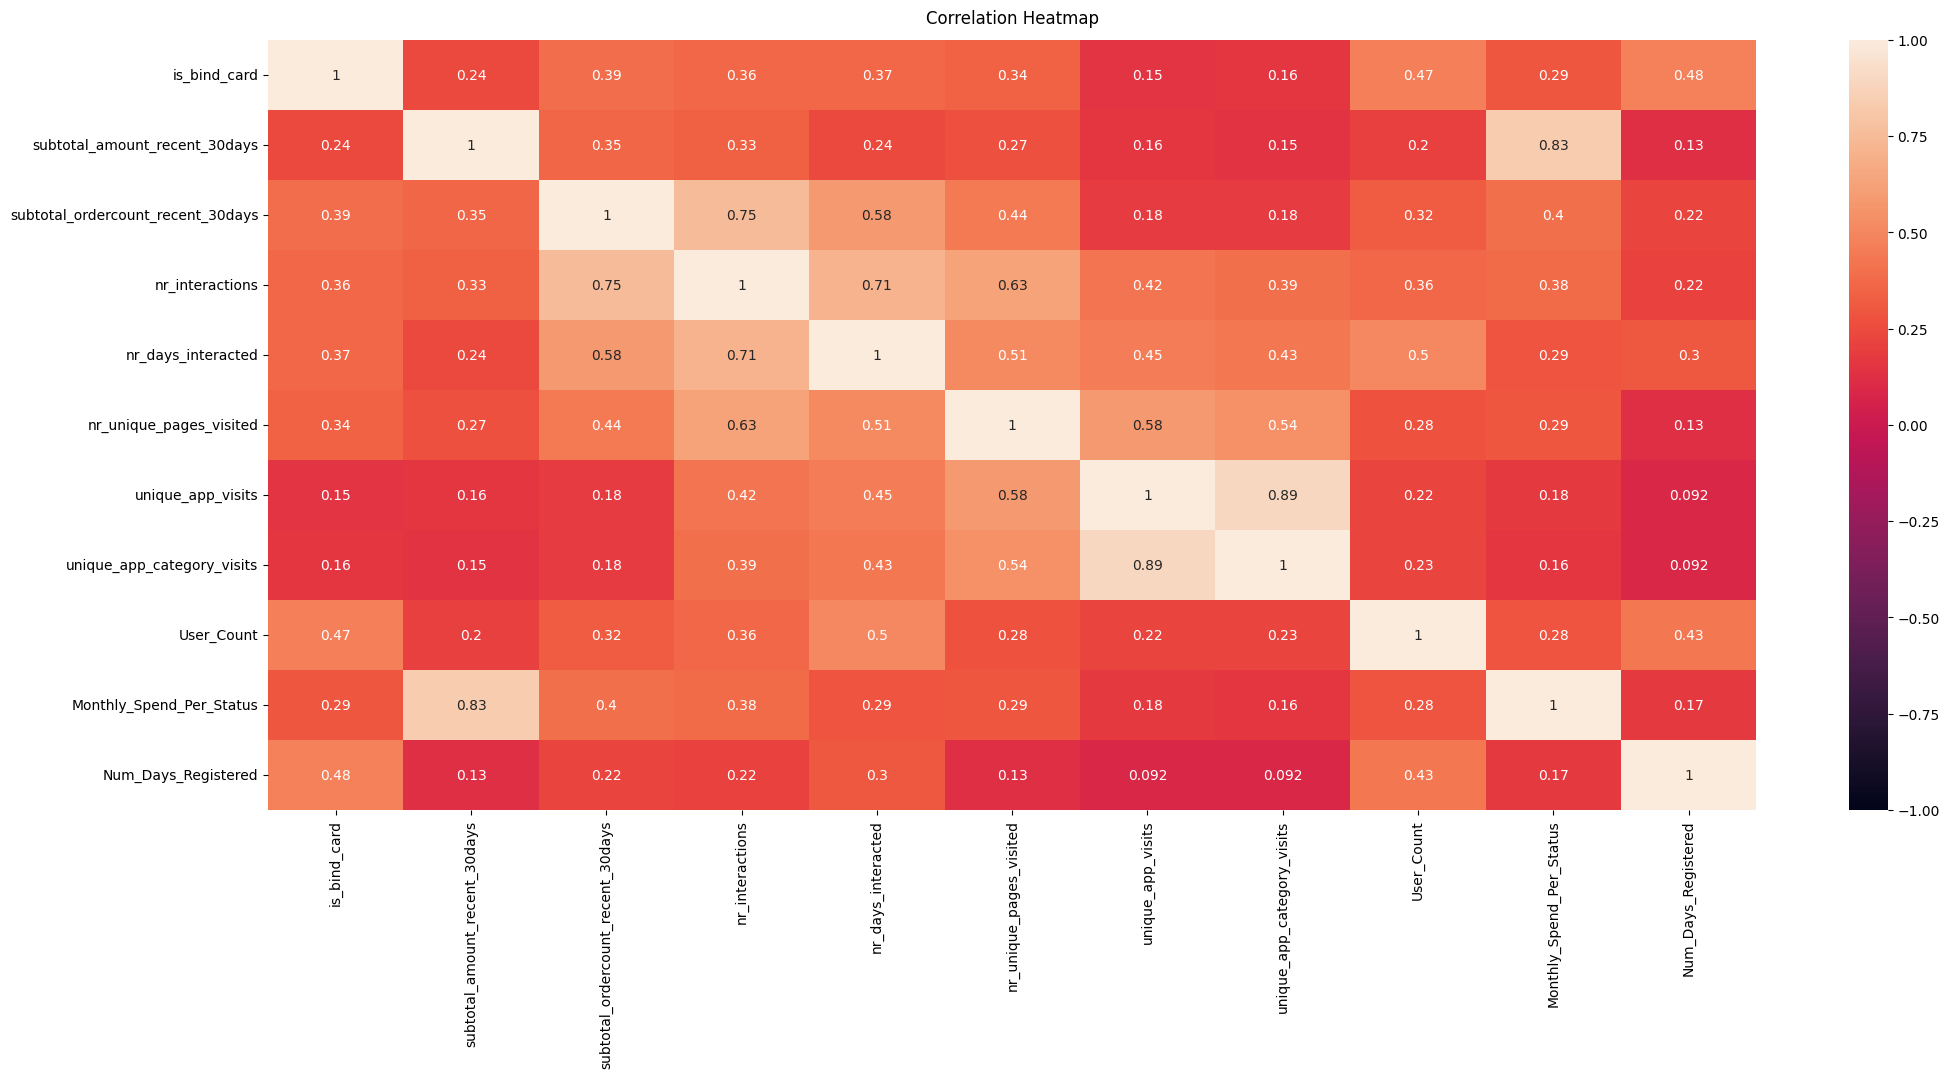

In [350]:
# heatmap.
plt.figure(figsize=(24, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X_test.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [353]:
# ### ROC
from sklearn import metrics

fig = metrics.plot_roc_curve( model, X, y, name="train")
fig = metrics.plot_roc_curve( model, X_test, y_test, ax = fig.ax_, name="test")
#fig = plot_roc_curve( logRegModel, X_test_oot, y_test_oot, ax = fig.ax_, name="OOT Dates / name")
fig.figure_.suptitle("ROC curve comparison")
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

In [242]:
predicted_probas = model.predict_proba(X_test)
kds.metrics.plot_cumulative_gain(y_test, predicted_probas[:,1])

NameError: name 'kds' is not defined

In [239]:
kds.metrics.plot_lift(y_test, predicted_probas[:,1])

NameError: name 'kds' is not defined